In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
xls_file = pd.ExcelFile('data/approval_ratings.xls')

In [3]:
xls_file.sheet_names

['Donald J. Trump',
 'Barack Obama',
 'George W. Bush',
 'William J. Clinton',
 'George Bush',
 'Ronald Reagan',
 'Jimmy Carter',
 'Gerald R. Ford',
 'Richard Nixon',
 'Lyndon B. Johnson',
 'John F. Kennedy',
 'Dwight D. Eisenhower',
 'Harry S. Truman',
 'Franklin D. Roosevelt']

In [4]:
sheet_list = []
for sheet in xls_file.sheet_names:
    df = xls_file.parse(sheet)
    df['Name'] = pd.Series([sheet]*len(df), index=df.index)
    sheet_list.append(df)

In [5]:
combined_df = pd.concat([sheet for sheet in sheet_list], ignore_index=True)

In [6]:
combined_df.head()

,Organization,Polling Start,Polling End,Approve,Disapprove,No Opinion,Sample Size,Name
0,Quinnipiac University,2017-01-20,2017-01-25,36,44,19,1190,Donald J. Trump
1,Gallup Organization,2017-01-21,2017-01-23,45,46,9,1500,Donald J. Trump
2,Gallup Organization,2017-01-24,2017-01-26,45,48,7,1500,Donald J. Trump
3,TIPP / IBD,2017-01-27,2017-02-02,42,48,9,885,Donald J. Trump
4,Gallup Organization,2017-01-27,2017-01-29,43,50,7,1500,Donald J. Trump


In [7]:
combined_df['Polling Start'] = pd.to_datetime(combined_df['Polling Start'])
combined_df['Polling End'] = pd.to_datetime(combined_df['Polling End'])

In [8]:
combined_df.to_csv('data/all_approval.csv', index=False)

/Users/ratulesrar/anaconda3/lib/python3.5/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


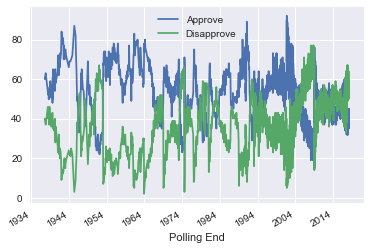

In [9]:
combined_df.plot('Polling End', ['Approve', 'Disapprove'])